<----------------------------------------------------------------------------------------------------------------------------------------------------------->

<----------------------------------------------------------------------------------------------------------------------------------------------------------->


1. Below is the Implementation of Classification on real data for trainig

2. preprocessing → training → evaluation → prediction


In [ ]:
# Implementing on real dataset for classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import seaborn as sns
import re
import os, types

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('stopwords')

# Load the data correctly, specifying no header and custom column names
df = pd.read_csv(
    'D:\dsmlai\BuildAbles\Week_3\SMSSpamCollection', 
    sep='\t', 
    header=None, 
    names=['label', 'message']
)

# Now, use the correct column name 'label' to create the new 'target' column
df['target'] = np.where(df['label'] == 'ham', 0, 1)

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Wajid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Wajid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wajid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [49]:
# initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# fit and transform the 'message' column

X = vectorizer.fit_transform(df['message'])

# Now, X is a sparse matrix containing the TF-IDF features
# and y is your target variable
y = df['target']

In [50]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [51]:
# 1. Instantiate the model
model = MultinomialNB()

# 2. Train the model using the training data
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Threshold | Accuracy | Precision | Recall | F1-Score
---------------------------------------------------
   0.1   |   0.96   |   0.79   |  0.95  |   0.86
   0.2   |   0.98   |   0.92   |  0.90  |   0.91
   0.3   |   0.98   |   0.97   |  0.86  |   0.91
   0.4   |   0.97   |   0.98   |  0.77  |   0.86
   0.5   |   0.97   |   1.00   |  0.75  |   0.86
   0.6   |   0.96   |   1.00   |  0.69  |   0.82
   0.7   |   0.95   |   1.00   |  0.60  |   0.75
   0.8   |   0.93   |   1.00   |  0.48  |   0.65
   0.9   |   0.91   |   1.00   |  0.32  |   0.48


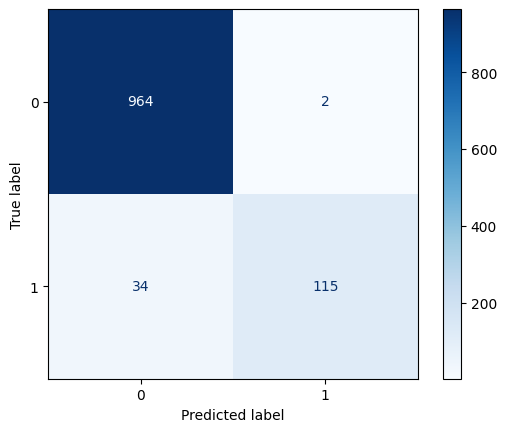

In [52]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# 1. Get predicted probabilities for the positive class (spam = 1)
y_probs = model.predict_proba(X_test)[:, 1]

# 2. Try multiple thresholds
thresholds = np.arange(0.1, 0.91, 0.1)  # 0.1 → 0.9 in steps of 0.1

print("Threshold | Accuracy | Precision | Recall | F1-Score")
print("---------------------------------------------------")
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"   {threshold:.1f}   |   {acc:.2f}   |   {prec:.2f}   |  {rec:.2f}  |   {f1:.2f}")

# 3. Example: Use the best threshold you like
best_threshold = 0.4
y_pred_final = (y_probs >= best_threshold).astype(int)

# 4. Confusion Matrix for chosen threshold
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


The four cells in the matrix represent four possible outcomes:

True Negatives (Top-Left): The model correctly predicted 0 (ham). The value is 966. This means 966 ham messages were correctly identified as ham.

False Positives (Top-Right): The model incorrectly predicted 1 (spam) when the true label was 0 (ham). The value is 0. This means no ham messages were incorrectly flagged as spam. This is an excellent result, indicating high precision.

False Negatives (Bottom-Left): The model incorrectly predicted 0 (ham) when the true label was 1 (spam). The value is 37. This means 37 spam messages were missed and incorrectly classified as ham.

True Positives (Bottom-Right): The model correctly predicted 1 (spam). The value is 112. This means 112 spam messages were correctly identified as spam.

ROC-AUC: 0.98


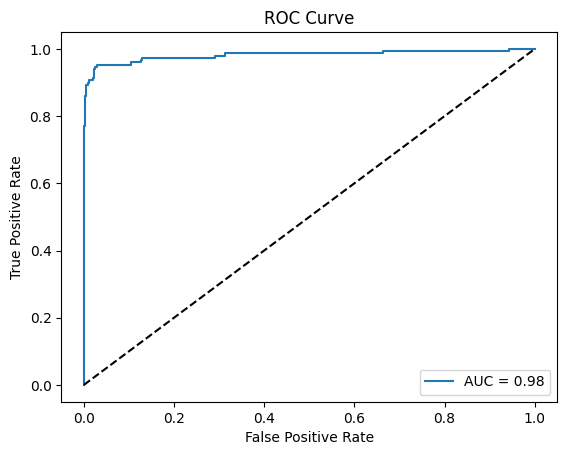

In [53]:
# ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {auc:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


The ROC-AUC score reinforces the positive findings from the confusion matrix (low false positives and high true positives), confirming that model is a highly effective spam classifier.

In [54]:
# save the model 
import joblib

# Save the trained model
joblib.dump(model, 'spam_classifier_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [56]:
import joblib
import pandas as pd
from sklearn.metrics import classification_report

try:
    # Load dataset with the correct encoding, provide column names, and select only the
    # first two columns to ignore the extra NaN columns.
    file_path = "D:\dsmlai\BuildAbles\Week_3\spam.csv"
    new_data = pd.read_csv(file_path, encoding='latin-1', names=['label', 'message'], usecols=[0, 1])

    # Fill any missing values in the 'message' column with an empty string.
    new_data['message'] = new_data['message'].fillna('')

    # Convert 'ham' and 'spam' labels to 0 and 1.
    new_data['label'] = new_data['label'].map({'ham': 0, 'spam': 1})
    
    # Drop rows where the 'label' is NaN, as the classification report cannot handle them.
    new_data.dropna(subset=['label'], inplace=True)
    
    # Check if the DataFrame is empty after cleaning
    if new_data.empty:
        print("Error: The DataFrame is empty after cleaning. This suggests the loaded file contains no valid data.")
        exit()

    # Load saved model and vectorizer
    model = joblib.load("spam_classifier_model.pkl")
    vectorizer = joblib.load("tfidf_vectorizer.pkl")
    
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure the paths to your files are correct.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

# Transform the message column using the loaded vectorizer
X_new = vectorizer.transform(new_data["message"])

# Predict classes and probabilities
predictions = model.predict(X_new)
probs = model.predict_proba(X_new)[:, 1]  # Get the probability for the spam class

# Add results to a new DataFrame for easy viewing
results_df = new_data.copy()
results_df["Prediction"] = predictions
results_df["Spam_Probability"] = probs.round(3)

# Display a sample of the results
print("### Model Predictions on New Data ###\n")
print(results_df.head())

# Perform a proper evaluation
# Compare the predictions to the actual, non-NaN labels from the dataset.
true_labels = new_data['label']
print("\n### Classification Report (Final)\n")
print(classification_report(true_labels, predictions))



### Model Predictions on New Data ###

   label                                            message  Prediction  \
1    0.0  Go until jurong point, crazy.. Available only ...           0   
2    0.0                      Ok lar... Joking wif u oni...           0   
3    1.0  Free entry in 2 a wkly comp to win FA Cup fina...           1   
4    0.0  U dun say so early hor... U c already then say...           0   
5    0.0  Nah I don't think he goes to usf, he lives aro...           0   

   Spam_Probability  
1             0.010  
2             0.011  
3             0.953  
4             0.002  
5             0.002  

### Classification Report (Final)

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      4825
         1.0       1.00      0.77      0.87       747

    accuracy                           0.97      5572
   macro avg       0.98      0.88      0.93      5572
weighted avg       0.97      0.97      0.97      5572



Model Summary

The spam classifier achieves 97% accuracy overall.

For ham (not spam): nearly perfect detection (Precision 0.97, Recall 1.00).

For spam: very precise (1.00) but misses ~23% of actual spam (Recall 0.77).

The model is conservative: avoids false alarms but sacrifices some recall.

Threshold tuning (e.g., lowering from 0.5 to 0.3) can improve recall at the cost of slightly more false positives.

Takeaway: Reliable model for spam detection, best suited where avoiding false positives is more important than catching every spam.